# Hands on timeseries analysis
### part3 : Visualizing time series data

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div> 

<div style="text-align: right"> Initial upload: 2020.07.27 </div> 
<div style="text-align: right"> Last update: 2024.10.31 </div> 

앞장에서 rolling.mean()을 활용하여 이동평균(Moving average)를 계산하는 방법에 대하여 살펴보았다.  
이동평균의 대표적인 활용처는 다음과 같다.  
- 원본 데이터를 smoothing(또는 denoising) 하여 전체적인 트렌드를 파악  
- 과거 데이터를 기반으로 미래의 값을 예측(Forecasting)  

본 장에서는 이동평균을 활용하여 트렌드 분석을 하는 방법과 시각화와 병행하여 살펴본다.

### 1. Bollinger bands  
볼린저 밴드는 이동평균선을 기준으로 주가가 어느정도에 위치해 있는지 측정하기 위한 기법이다.[[참고자료]](https://namu.wiki/w/%EB%B3%BC%EB%A6%B0%EC%A0%80%20%EB%B0%B4%EB%93%9C)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 500)

애플 주식 데이터 읽기

In [2]:
# 시간형식을 지정하는 함수
def dateparser(str_dt):
    return datetime.datetime.strptime(str_dt, "%Y-%m-%d")

In [3]:
url = 'https://raw.githubusercontent.com/sguys99/datasets/master/apple_stock.csv'
stock = pd.read_csv(url, index_col = 'Date', parse_dates=['Date'],
                       date_parser=dateparser)

In [4]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


볼린저 밴드는 기준선(20일 이동평균), 상단선(20일 이동평균 + 표준편차x2), 하단선(20일 이동평균 - 표준편차x2)으로 구성된다.

기준선(20일 이동평균) 계산하기

In [5]:
stock['MA_Close(20)'] = stock['Close'].rolling(window=20).mean()

상단선/ 하단선 계산하기

In [6]:
stock['Upper'] = stock['Close'].rolling(window=20).mean() + 2*stock['Close'].rolling(window = 20).std()

In [7]:
stock['Lower'] = stock['Close'].rolling(window=20).mean() - 2*stock['Close'].rolling(window = 20).std()

In [8]:
stock.head(50)

,High,Low,Open,Close,Volume,Adj Close,MA_Close(20),Upper,Lower
Date,,,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,NaN,NaN,NaN
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,NaN,NaN,NaN
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,NaN,NaN,NaN
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,NaN,NaN,NaN
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,NaN,NaN,NaN
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305,NaN,NaN,NaN
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.100410,NaN,NaN,NaN
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.871763,NaN,NaN,NaN
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.152065,NaN,NaN,NaN


### 2. 시각화 하기

먼저 matplotlib으로 간단히 차트를 그려본다.

<Axes: xlabel='Date'>

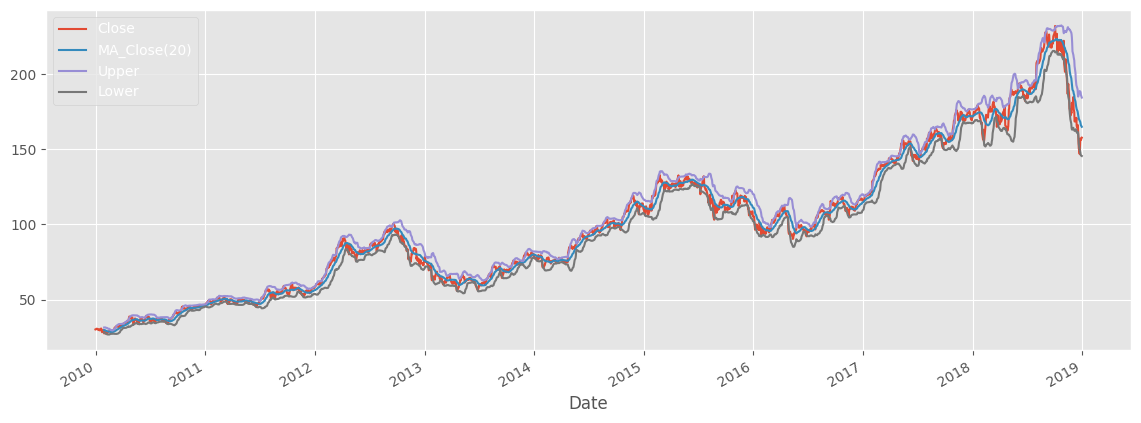

In [9]:
stock[['Close', 'MA_Close(20)', 'Upper', 'Lower']].plot(figsize = (14, 5))

<Axes: xlabel='Date'>

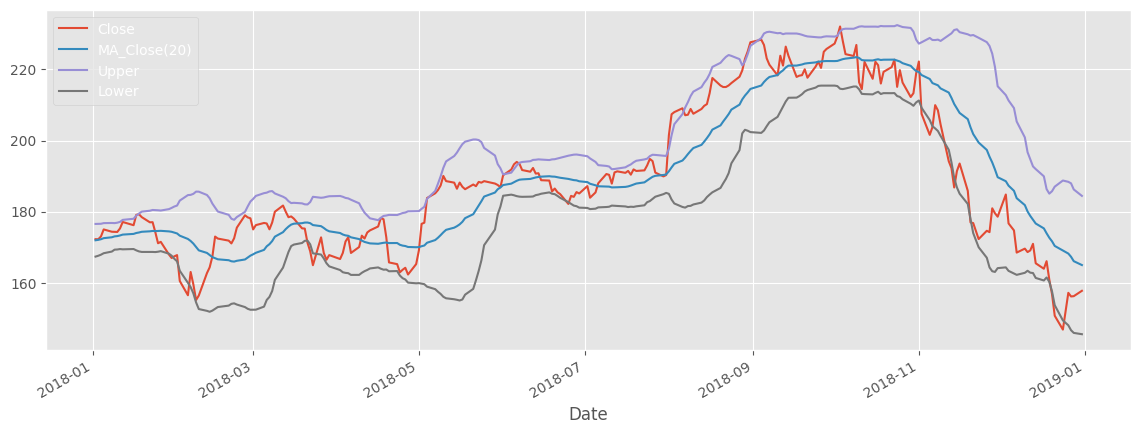

In [10]:
# 2018년 이후 결과만 시각화
stock['2018':][['Close', 'MA_Close(20)', 'Upper', 'Lower']].plot(figsize = (14, 5))

시각화 함수 구현하기

In [11]:
def plotBolingerbands(df, window = 20, bands_on = False, scale = 2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    
    if bands_on:
        upper_bound = rolling_mean + scale*df['Close'].rolling(window=window).std()
        lower_bound = rolling_mean - scale*df['Close'].rolling(window=window).std()
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")
        
    plt.plot(df[window:]['Close'], label ='Actual values')
    plt.legend(loc = 'best')
    plt.grid(True)

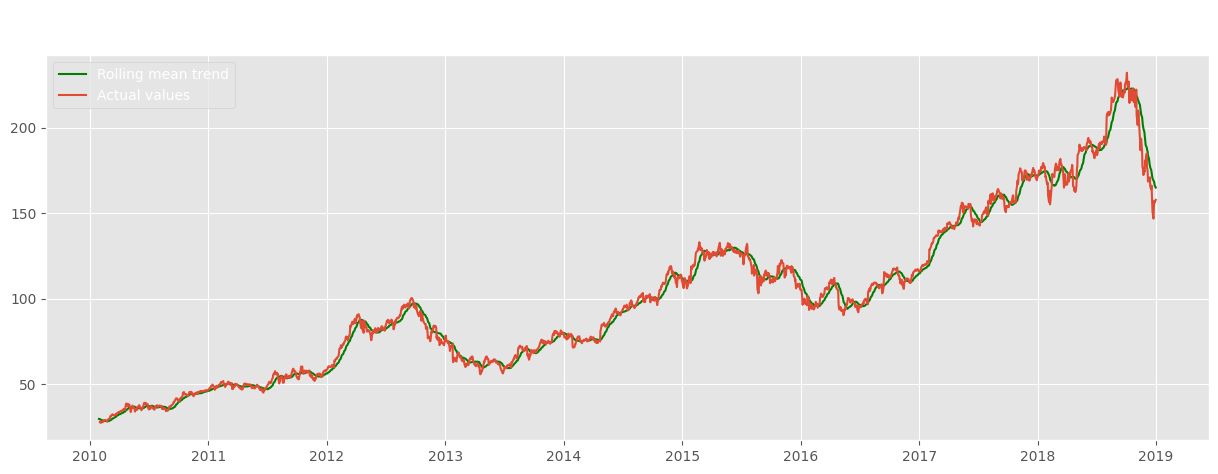

In [12]:
plotBolingerbands(stock)

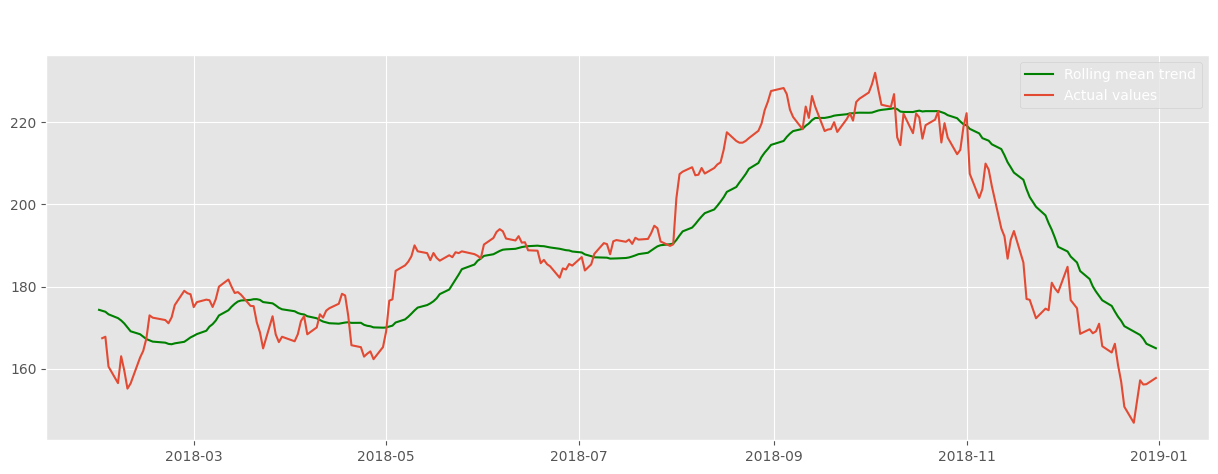

In [13]:
plotBolingerbands(stock['2018':])

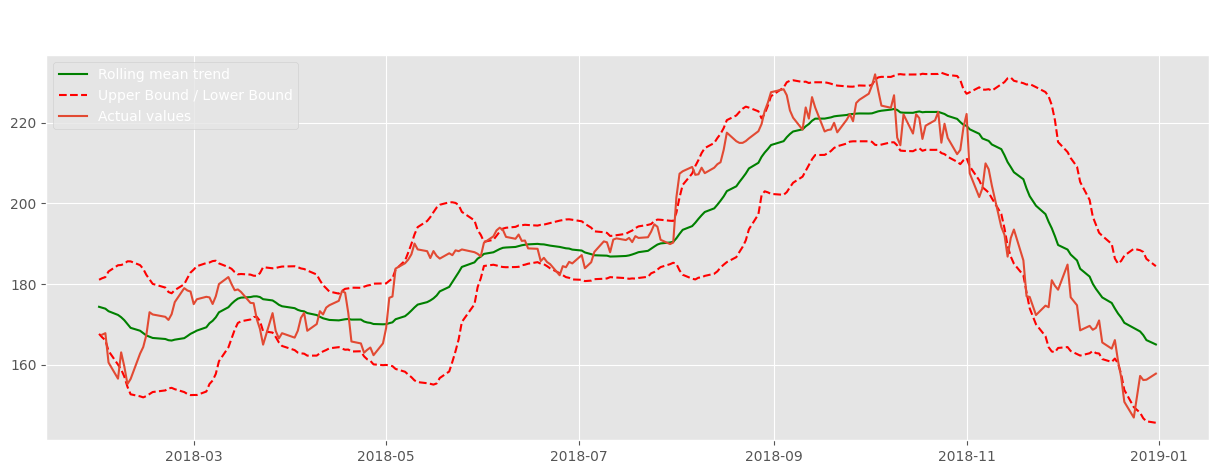

In [14]:
plotBolingerbands(stock['2018':], bands_on=True)

윈도우 사이즈 조정해보기 : 5, 20, 60

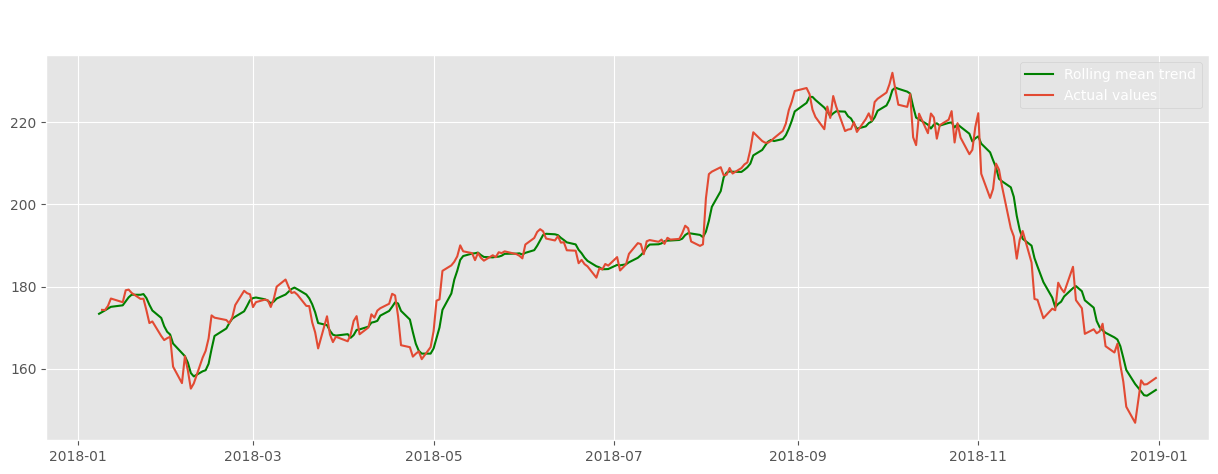

In [15]:
plotBolingerbands(stock['2018':], window = 5)

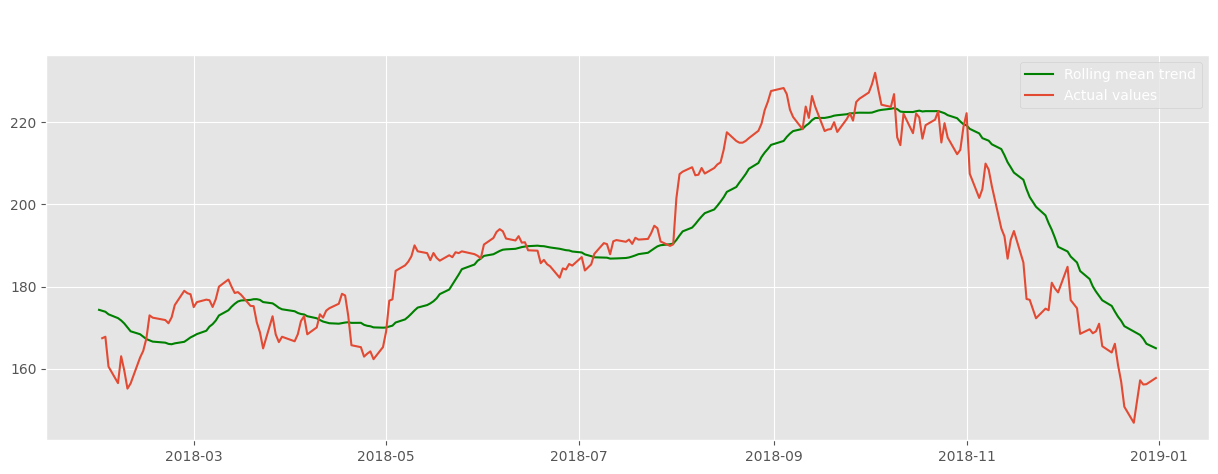

In [16]:
plotBolingerbands(stock['2018':], window = 20)

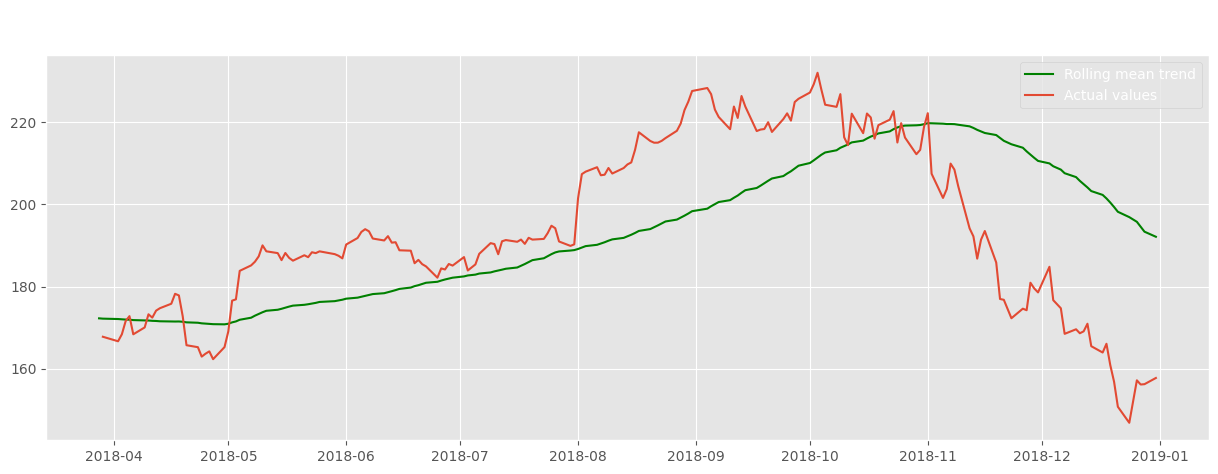

In [17]:
plotBolingerbands(stock['2018':], window = 60)

- 윈도우 사이즈가 커질수록 추세선은 더 부드러워진다.  
- 그러나 시간지연(lag) 효과가 크게 나타난다.

### 3. 시각화 관련 설정

크기가 다른 값을 한개의 차트에 그릴 때 : secondary_y  
- 'Close'와 'Volume' 컬럼의 값을 한차트에 그려본다.

<Axes: title={'center': 'Close and Volume'}, xlabel='Date'>

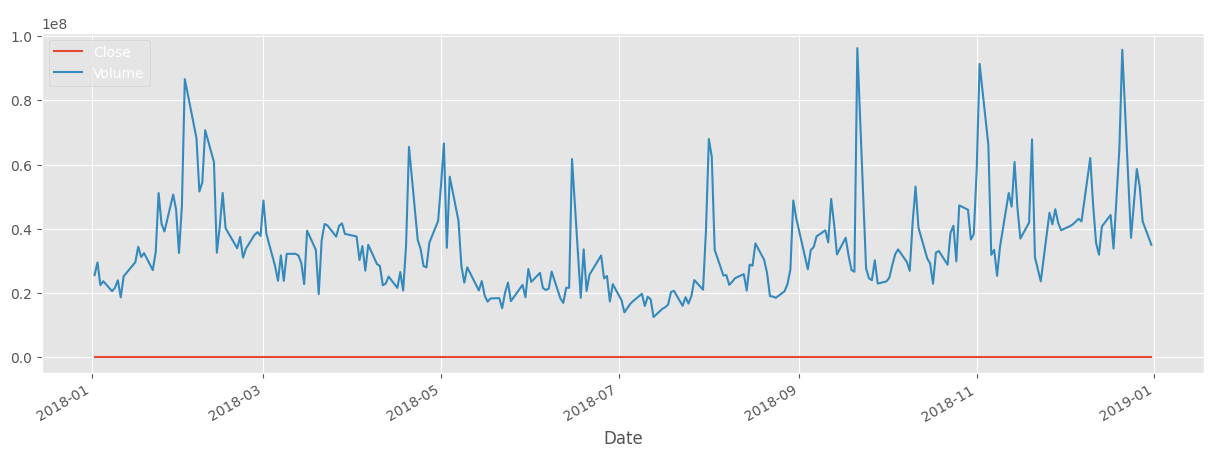

In [18]:
stock['2018':][['Close', 'Volume']].plot(figsize = (15, 5), title = 'Close and Volume')

- 두 컬럼의 variance 차이로 인해 상관도 확인이 불편하다.

<Axes: title={'center': 'Close and Volume'}, xlabel='Date'>

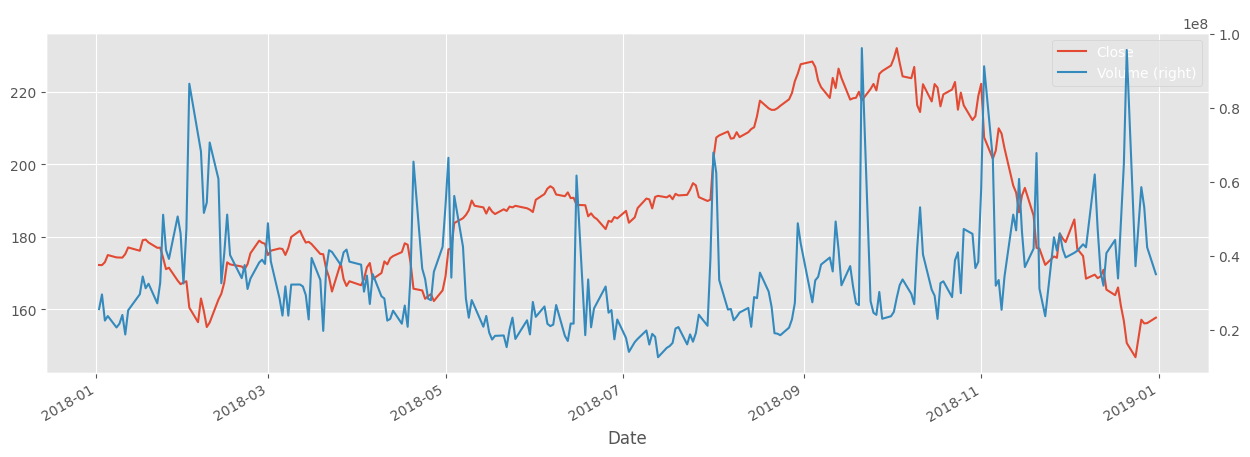

In [19]:
stock['2018':][['Close', 'Volume']].plot(figsize = (15, 5), secondary_y = ['Volume'],
                                         title = 'Close and Volume')

Limit 설정

<Axes: xlabel='Date'>

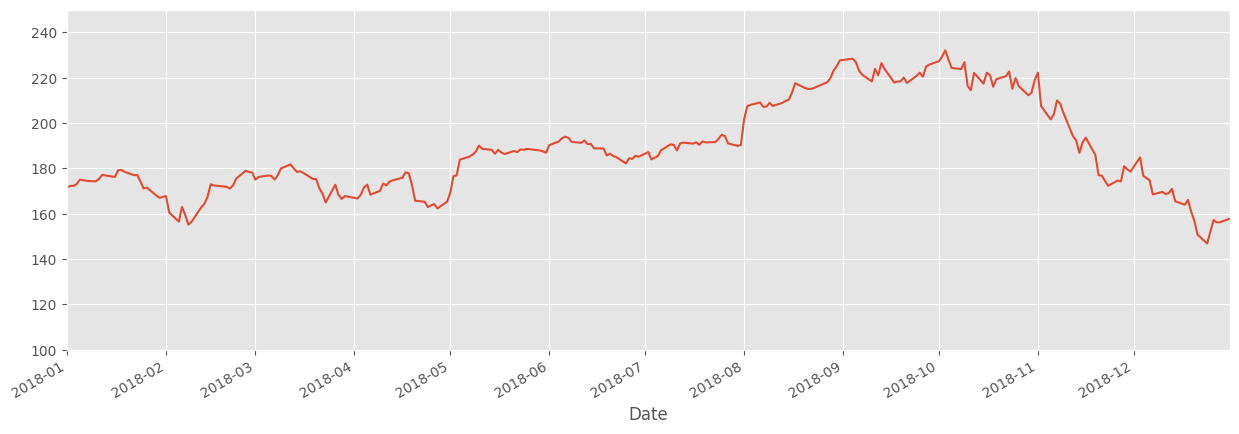

In [20]:
stock['Close'].plot(xlim = ['2018-1-1', '2018-12-31'], ylim = [100, 250], 
                    figsize = (15, 5))

Line 설정

<Axes: xlabel='Date'>

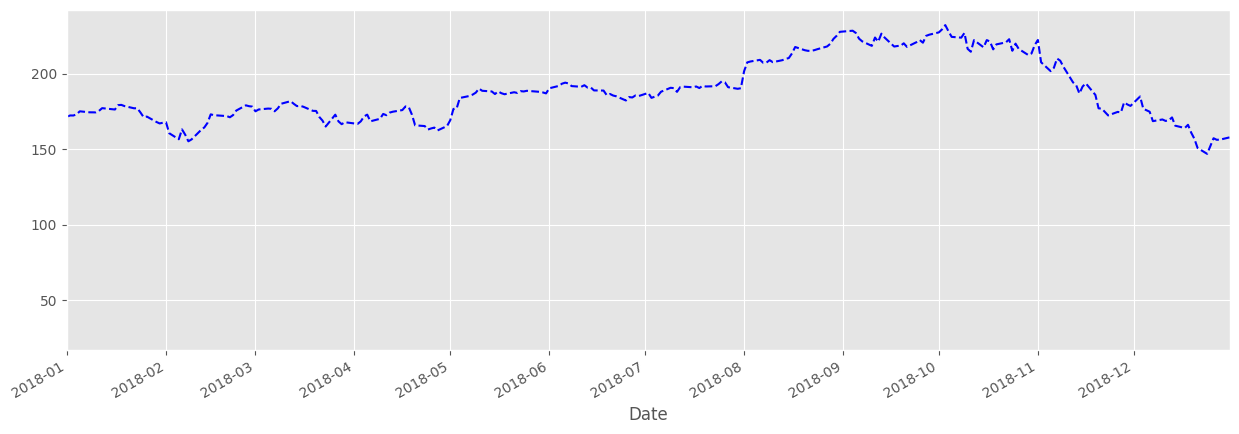

In [21]:
stock['Close'].plot(xlim = ['2018-1-1', '2018-12-31'], color = 'b', linestyle = '--' ,
                    figsize = (15, 5))

시간축(x) 포맷 조정

In [22]:
import matplotlib.dates as dates

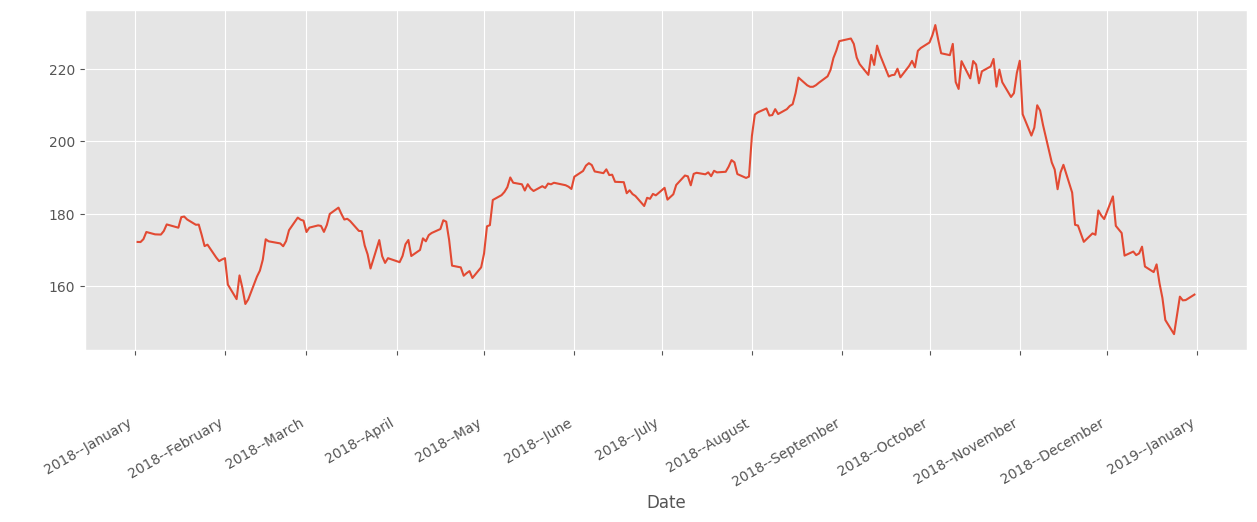

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
stock['2018':]['Close'].plot(ax =ax)
# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n\n%Y--%B'))

fig.autofmt_xdate() # Auto fixes the overlap
plt.show()

보조 시간축(x) 설정

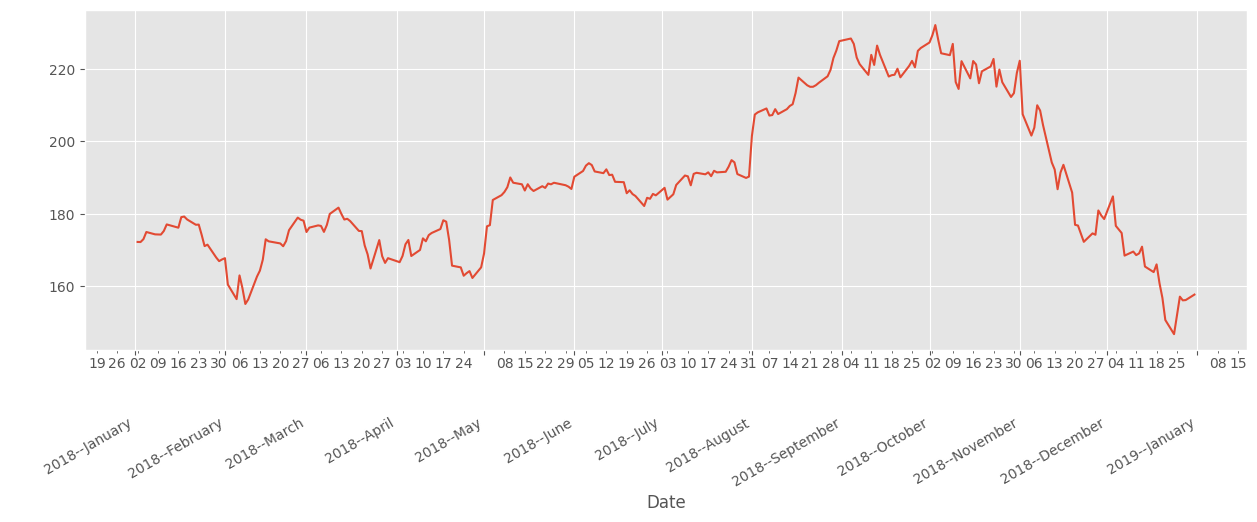

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
stock['2018':]['Close'].plot(ax =ax)
# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n\n%Y--%B'))

# Minor Axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

fig.autofmt_xdate() # Auto fixes the overlap
plt.show()

날짜 표시 포매팅

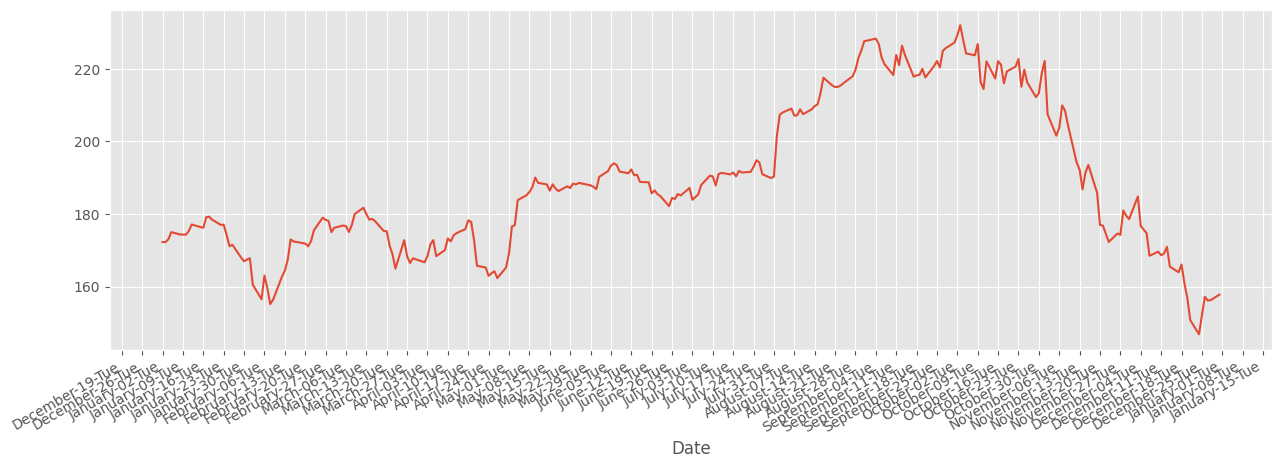

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
stock['2018':]['Close'].plot(ax =ax)
# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%B-%d-%a'))

fig.autofmt_xdate() # Auto fixes the overlap
plt.show()